In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn.datasets import make_blobs
from sklearn import manifold,datasets
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

In [16]:
x1,y1=make_blobs(n_samples=400,centers=[[1,1],[-4,3],[3,5],[2,-4]],cluster_std=0.9)

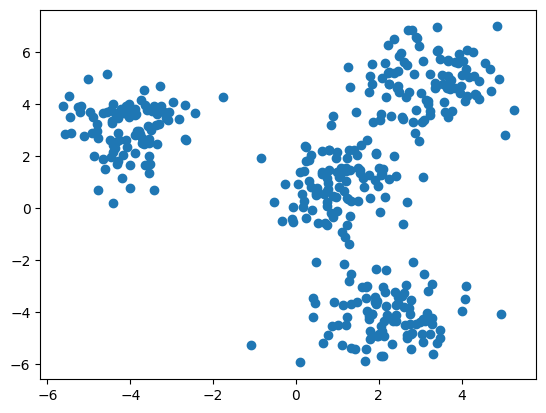

In [17]:
plt.scatter(x1[:,0],x1[:,1],marker='o')

In [18]:
model=AgglomerativeClustering(n_clusters=4,linkage='complete')
model

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [19]:
model.fit(x1,y1)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [21]:
labels=model.labels_
labels

array([0, 0, 1, 1, 3, 1, 0, 0, 1, 3, 2, 0, 2, 1, 2, 2, 0, 3, 1, 2, 2, 3,
       0, 1, 2, 2, 2, 0, 1, 3, 1, 2, 3, 1, 0, 3, 1, 3, 3, 3, 0, 1, 1, 1,
       0, 0, 3, 0, 2, 2, 0, 3, 2, 3, 1, 2, 0, 3, 0, 1, 1, 0, 3, 0, 2, 2,
       3, 0, 2, 1, 0, 2, 2, 0, 3, 0, 2, 2, 3, 1, 1, 3, 2, 0, 1, 3, 1, 3,
       1, 1, 0, 3, 1, 0, 1, 1, 1, 1, 3, 3, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       3, 3, 3, 2, 3, 2, 0, 1, 2, 3, 3, 1, 1, 1, 0, 1, 2, 1, 2, 3, 1, 1,
       2, 2, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 3, 0, 1, 1, 0,
       0, 3, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 1, 2, 1, 1, 3, 3, 1, 2,
       3, 0, 0, 2, 0, 1, 3, 0, 1, 1, 0, 3, 0, 1, 1, 3, 1, 0, 0, 0, 2, 3,
       0, 2, 1, 2, 1, 2, 1, 2, 0, 0, 2, 1, 1, 3, 1, 3, 2, 1, 0, 3, 3, 3,
       2, 2, 0, 0, 1, 1, 3, 2, 2, 1, 0, 2, 3, 1, 3, 0, 1, 2, 1, 3, 3, 1,
       1, 1, 2, 3, 0, 1, 2, 2, 2, 0, 3, 0, 1, 1, 0, 3, 0, 2, 3, 2, 0, 2,
       0, 2, 2, 3, 1, 3, 2, 0, 0, 2, 3, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       3, 0, 1, 2, 1, 3, 3, 1, 1, 0, 3, 1, 1, 3, 3,

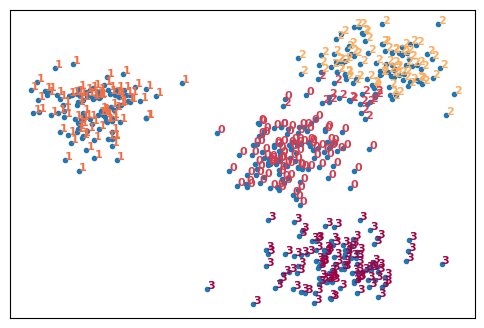

In [34]:
plt.figure(figsize=(6,4))
#creating a minimum and maximum range
x_min,x_max=np.min(x1,axis=0),np.max(x1,axis=0)

#Getting the maximum
x1 = (x1 - x_min) / (x_max - x_min)
for i in range(x1.shape[0]):
    plt.text(x1[i,0],x1[i,1],y1[i],color=plt.cm.Spectral(labels[i]/10.0),fontdict={"weight":"bold","size":8})
plt.xticks(())
plt.yticks(())

plt.scatter(x1[:,0],x1[:,1],marker='.')
plt.show()


In [43]:
dist_matrix=distance_matrix(x1,x1)
dist_matrix

array([[0.        , 0.13994766, 0.38012377, ..., 0.68951812, 0.42636037,
        0.81885379],
       [0.13994766, 0.        , 0.45956496, ..., 0.80875072, 0.53285673,
        0.82697764],
       [0.38012377, 0.45956496, 0.        , ..., 0.40299978, 0.13086805,
        0.51434247],
       ...,
       [0.68951812, 0.80875072, 0.40299978, ..., 0.        , 0.28551205,
        0.7293027 ],
       [0.42636037, 0.53285673, 0.13086805, ..., 0.28551205, 0.        ,
        0.60120742],
       [0.81885379, 0.82697764, 0.51434247, ..., 0.7293027 , 0.60120742,
        0.        ]])

In [45]:
z=hierarchy.linkage(dist_matrix,"average")

/tmp/ipykernel_151712/841806847.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z=hierarchy.linkage(dist_matrix,"average")


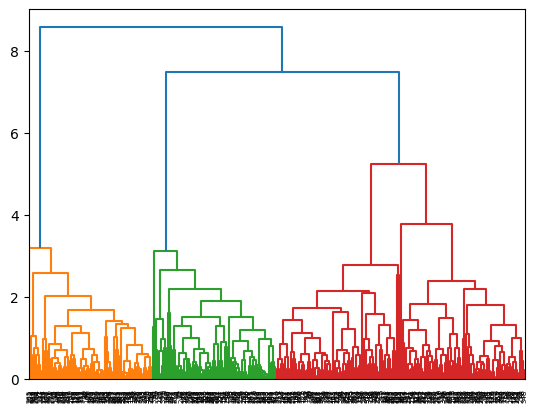

In [46]:
dendro=hierarchy.dendrogram(z)

**Vehicle Dataset**

In [50]:
df=pd.read_csv("cars_clus.csv")
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [51]:
df.shape

(159, 16)

In [52]:
df.size

2544

In [56]:
df[[ 'sales', 'resale', 'type', 'price', 'engine_s','horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap','mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap','mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)
df=df.reset_index(drop=True)
df.shape

(117, 16)

In [57]:
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [59]:
x=df[['engine_s','horsepow','wheelbas','width','length','curb_wgt','fuel_cap','mpg']]
x.head()

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0


In [60]:
from sklearn.preprocessing import MinMaxScaler
x=x.values
x=MinMaxScaler().fit_transform(x)
x[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

In [62]:
import scipy
length=x.shape[0]
d=scipy.zeros([length,length])
for i in range(length):
    for j in range(length):
        d[i,j] = scipy.spatial.distance.euclidean(x[i],x[j])
d

/tmp/ipykernel_151712/1465075842.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  d=scipy.zeros([length,length])


array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

In [64]:
z=hierarchy.linkage(d,'centroid')

/tmp/ipykernel_151712/959258883.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z=hierarchy.linkage(d,'centroid')


In [67]:
from scipy.cluster.hierarchy import fcluster
max_d=3
clusters=fcluster(z,max_d,criterion='distance')
clusters

array([3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3,
       6, 5, 5, 5, 5, 5, 5, 5, 5, 2, 1, 1, 1, 4, 5, 3, 5, 5, 5, 4, 5, 4,
       1, 5, 1, 3, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 3, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4,
       5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       5, 1, 3, 5, 5, 3, 3], dtype=int32)

In [68]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(z, k, criterion='maxclust')
clusters

array([2, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 2,
       5, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 3, 4, 2, 4, 4, 4, 3, 4, 3,
       1, 4, 1, 2, 4, 4, 4, 3, 2, 2, 4, 4, 2, 4, 4, 4, 4, 3, 3, 3, 2, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2,
       4, 1, 2, 4, 4, 2, 2], dtype=int32)

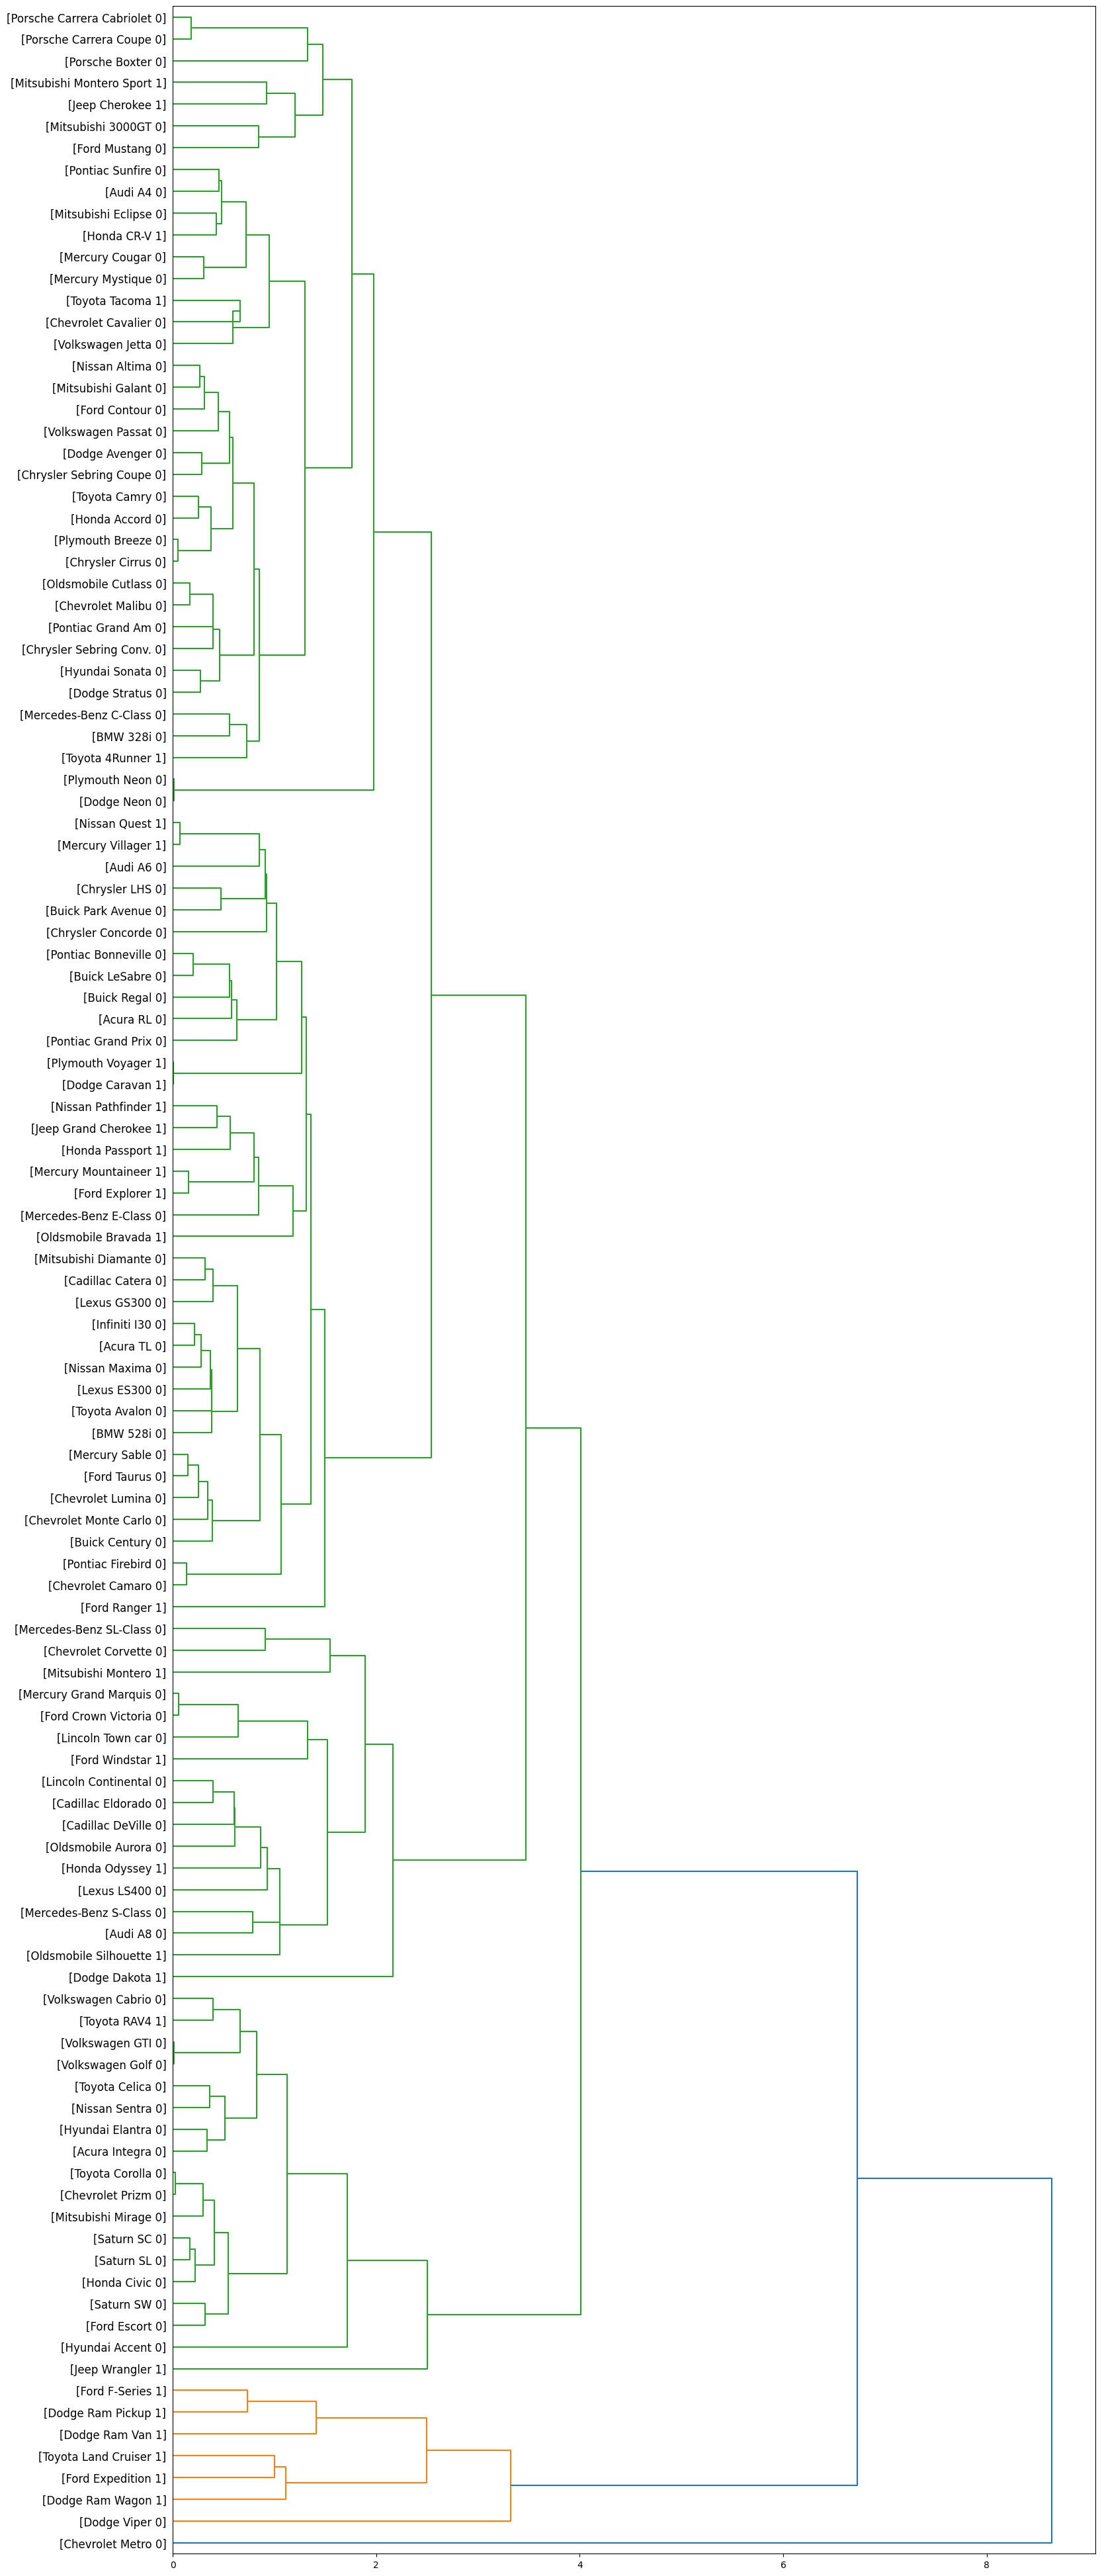

In [75]:
import pylab
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )
    
dendro = hierarchy.dendrogram(z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [77]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(x,x) 
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [78]:
z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

/tmp/ipykernel_151712/3855052826.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


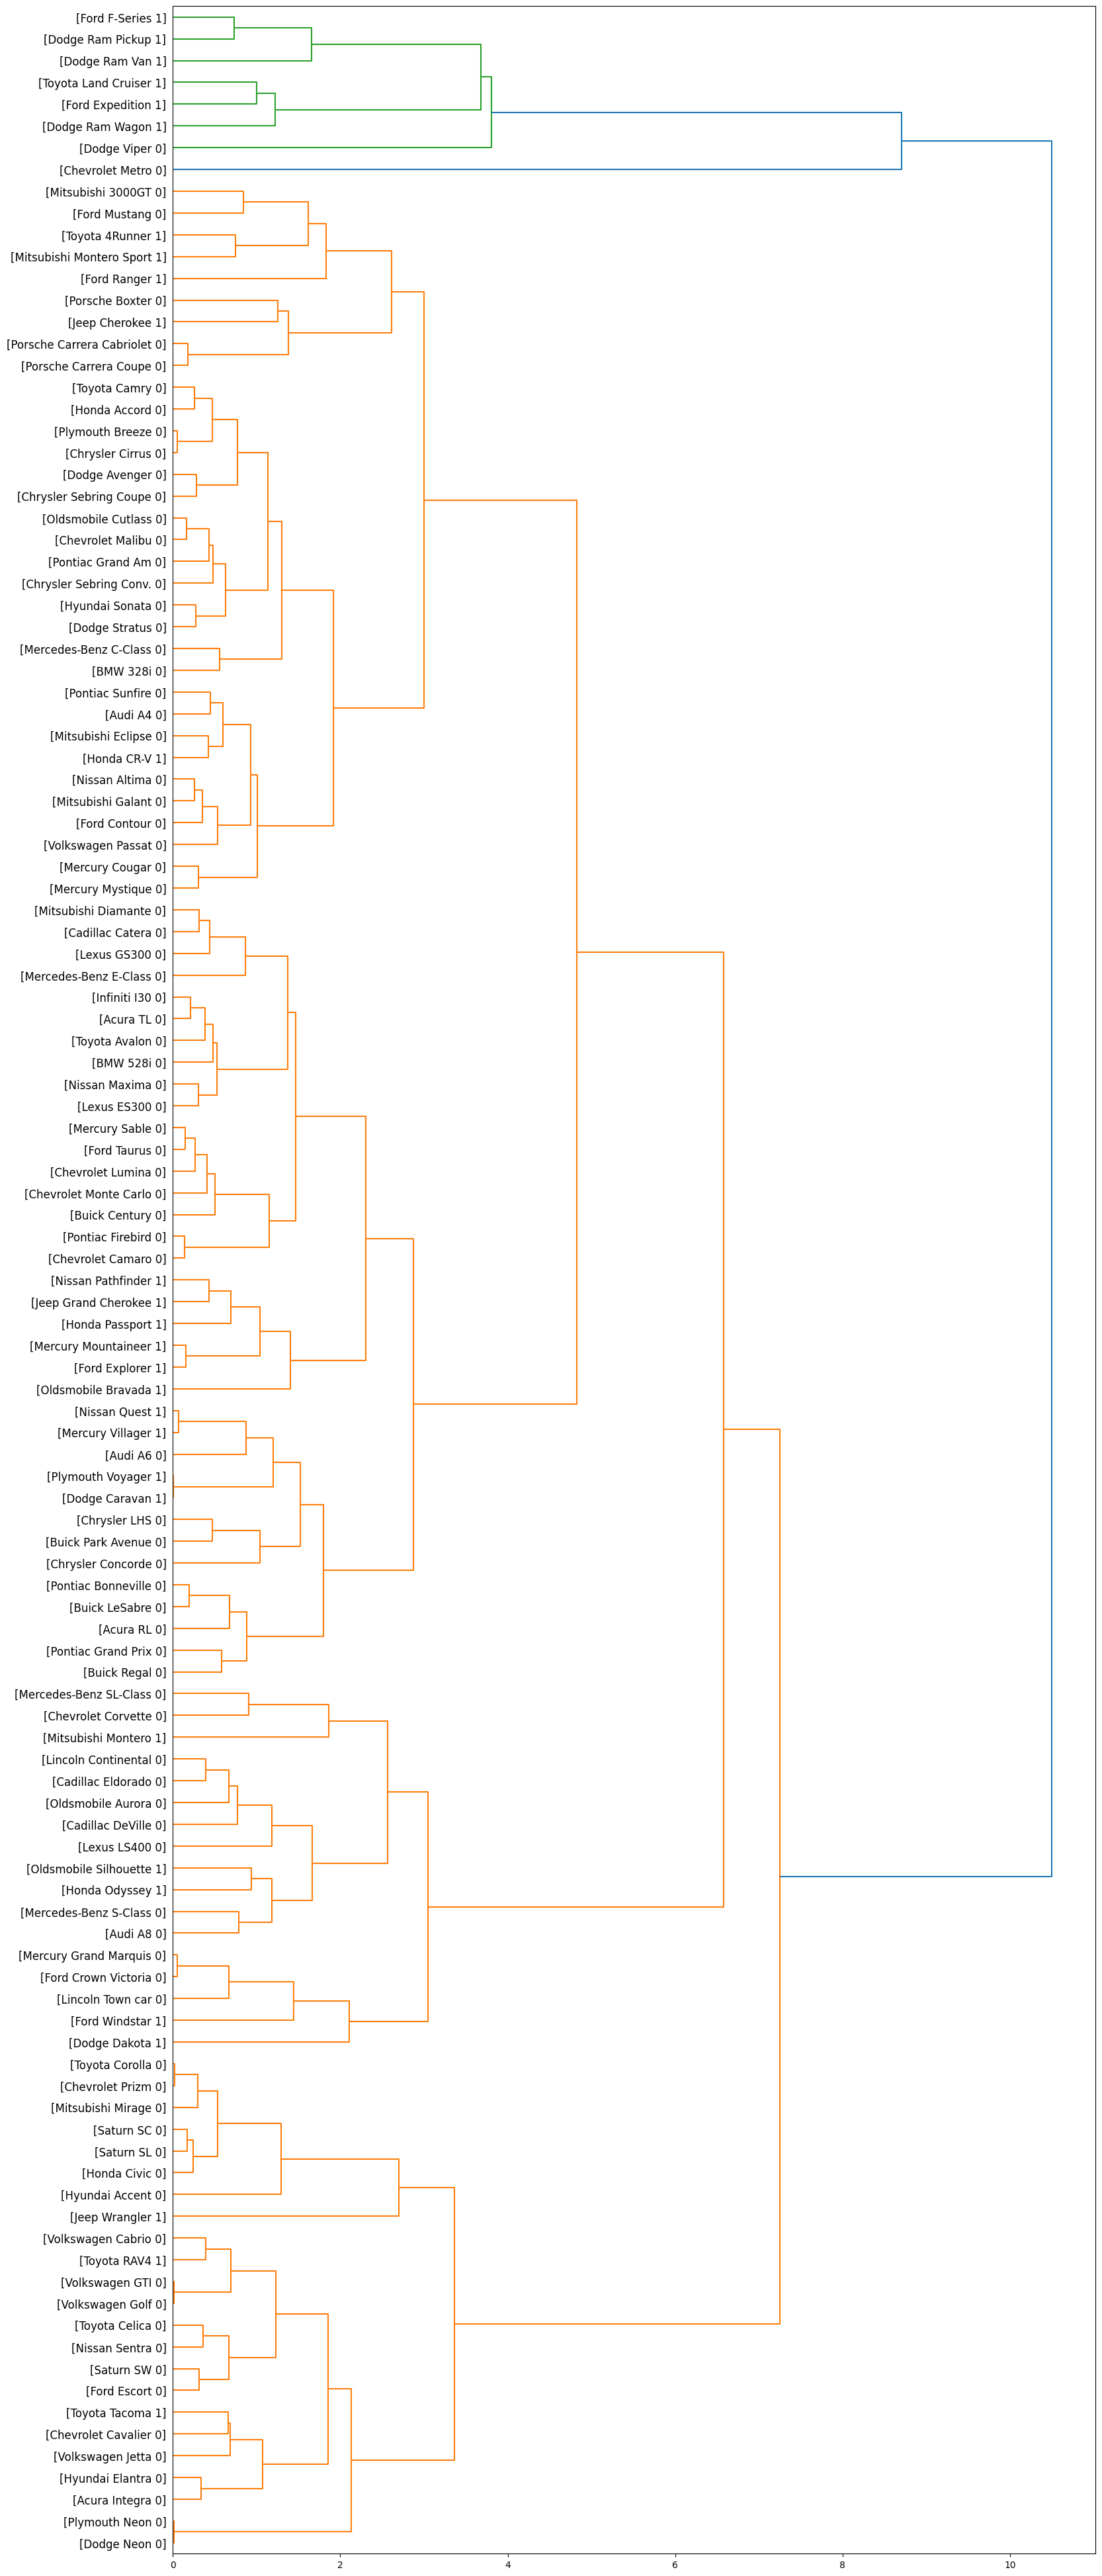

In [79]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )
    
dendro = hierarchy.dendrogram(z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [80]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

/home/rguktvalley/.local/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:567: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 2, 2, 3, 2, 4, 3, 2, 2, 2, 2, 2, 4, 4, 2, 1, 3, 2, 2, 2, 4, 1,
       5, 3, 3, 2, 3, 2, 1, 3, 3, 0, 0, 0, 0, 4, 2, 1, 3, 3, 2, 4, 2, 4,
       0, 3, 0, 1, 3, 3, 2, 4, 1, 1, 3, 2, 1, 3, 2, 2, 2, 4, 4, 4, 1, 3,
       3, 2, 3, 4, 3, 3, 3, 2, 4, 2, 2, 3, 2, 4, 4, 1, 3, 2, 2, 2, 3, 4,
       2, 4, 1, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1,
       3, 0, 1, 1, 3, 1, 1])

In [81]:
df['cluster_'] = agglom.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,3
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2


/tmp/ipykernel_151712/1206539117.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

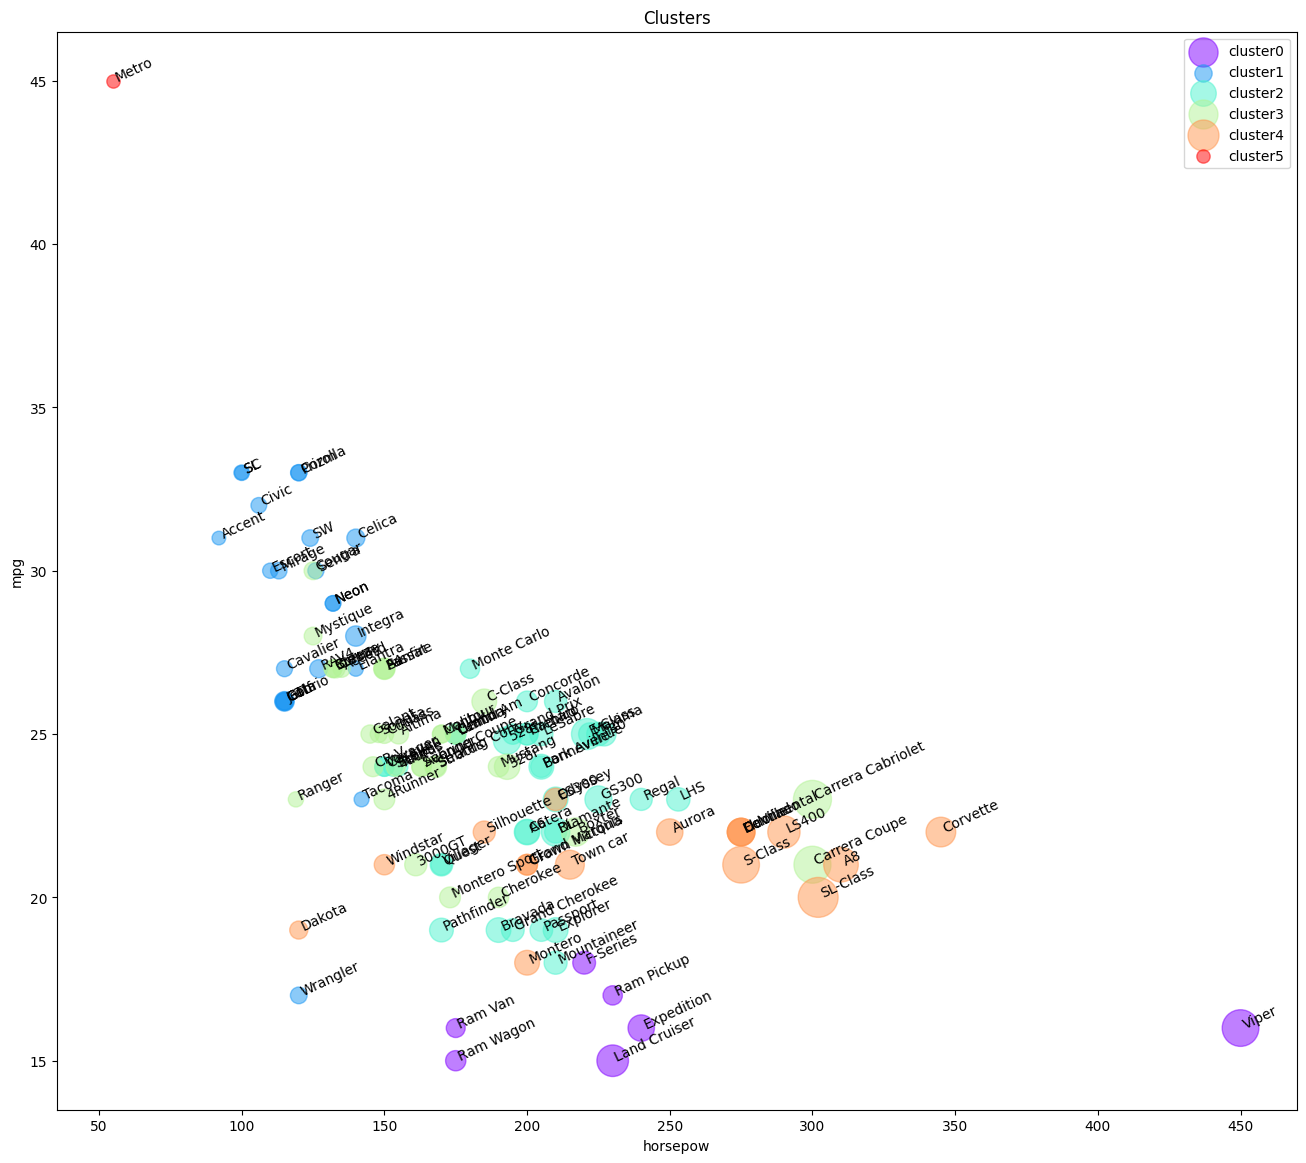

In [82]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [83]:
df.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0      1
          1.0      6
1         0.0     20
          1.0      3
2         0.0     26
          1.0     10
3         0.0     28
          1.0      5
4         0.0     12
          1.0      5
5         0.0      1
Name: cluster_, dtype: int64

In [98]:
agg_cars = df.groupby(['cluster_','type'])
agg_cars=agg_cars[['horsepow','engine_s','mpg','price']].mean()

/tmp/ipykernel_151712/731385151.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'mpg')

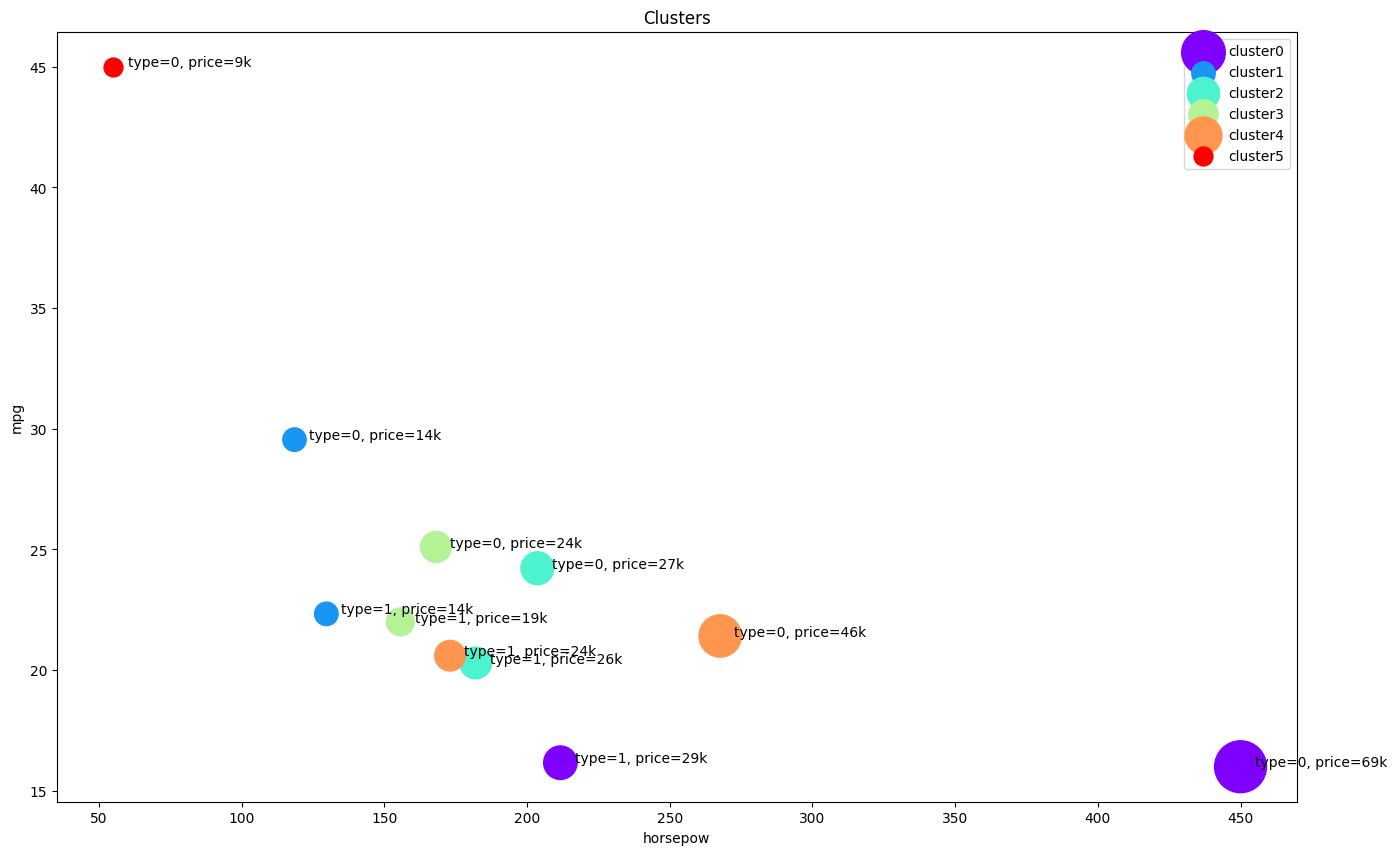

In [99]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')